## Exploratory Data Analysis on Brazilian E-commerce Dataset
This project explores the Olist E-commerce dataset from Brazil to uncover insights on customer behavior, product performance, delivery timelines, and more.

In [197]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [199]:
# Set visualization styles
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12,8)
sns.set_palette("Set2")

In [200]:
# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [203]:
print("Brazilian E-commerce EDA Project")
print("=" * 50)

Brazilian E-commerce EDA Project


#### Data Loading and Initial Exploration

In [227]:
# Load datasets
print("\n1. Loading datasets...")
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

print(f"Orders dataset: {orders.shape[0]} rows, {orders.shape[1]} columns")
print(f"Order items dataset: {order_items.shape[0]} rows, {order_items.shape[1]} columns")
print(f"Products dataset: {products.shape[0]} rows, {products.shape[1]} columns")
print(f"Customers dataset: {customers.shape[0]} rows, {customers.shape[1]} columns")
print(f"Payments dataset: {payments.shape[0]} rows, {payments.shape[1]} columns")
print(f"Reviews dataset: {reviews.shape[0]} rows, {reviews.shape[1]} columns")
print(f"Sellers dataset: {sellers.shape[0]} rows, {sellers.shape[1]} columns")
print(f"Category translation dataset: {category_translation.shape[0]} rows,{category_translation.shape[1]} columns")


1. Loading datasets...
Orders dataset: 99441 rows, 8 columns
Order items dataset: 112650 rows, 7 columns
Products dataset: 32951 rows, 9 columns
Customers dataset: 99441 rows, 5 columns
Payments dataset: 103886 rows, 5 columns
Reviews dataset: 99224 rows, 7 columns
Sellers dataset: 3095 rows, 4 columns
Category translation dataset: 71 rows,2 columns


In [228]:
# Display sample of each dataset
print("\nSample of orders data:")
print(orders.head(2))

print("\nSample of order_items data:")
print(order_items.head(2))

print("\nSample of products data:")
print(products.head(2))

print("\nSample of customers data:")
print(customers.head(2))

print("\nSample of payments data:")
print(payments.head(2))

print("\nSample of Reviews data:")
print(reviews.head(2))

print("\nSample of sellers data:")
print(sellers.head(2))

print("\nSample of category translation data:")
print(category_translation.head(2))


Sample of orders data:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  

Sample of order_items data:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id                         seller_id  \
0  

In [229]:
# Check data types and missing values
print("\n2. Checking data types and missing values for orders dataset:")
print(orders.info())
print("\nMissing values in orders dataset:")
print(orders.isnull().sum())


2. Checking data types and missing values for orders dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Missing values in orders dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_a

#### Data cleaning and preparation

In [231]:
print("\n3. Data cleaning and preparation...")
# Convert date columns to datetime format
date_columns = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date',
                'order_estimated_delivery_date']

for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])

# Check for duplicates
print(f"\nDuplicate orders: {orders.duplicated().sum()}")
print(f"Duplicate order items: {order_items.duplicated().sum()}")
print(f"Duplicate products: {products.duplicated().sum()}")
print(f"Duplicate customers: {customers.duplicated().sum()}")


3. Data cleaning and preparation...

Duplicate orders: 0
Duplicate order items: 0
Duplicate products: 0
Duplicate customers: 0


In [232]:
# Handle missing values in products dataset
print("\nMissing values in products dataset:")
print(products.isnull().sum())


Missing values in products dataset:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [233]:
# Fill missing product category names
products['product_category_name'] = products['product_category_name'].fillna('unknown')

# Translate product categories to English
# Merge with category translation
products = pd.merge(products, category_translation, 
                    on='product_category_name', 
                    how='left')

In [234]:
# Fill missing translated categories
products['product_category_name_english'] = products['product_category_name_english'].fillna('unknown')

In [235]:
# Create a merged dataset for order analysis
print("\n4. Creating merged datasets for analysis...")

# Merge orders with customers
orders_customers = pd.merge(orders, customers, on='customer_id', how='left')

# Merge orders with items and products
order_details = pd.merge(order_items, products[['product_id', 'product_category_name_english']], 
                        on='product_id', how='left')
order_details = pd.merge(order_details, orders[['order_id', 'order_purchase_timestamp', 
                                             'order_status', 'order_delivered_customer_date']], 
                       on='order_id', how='left')

# Merge with payments
order_payments = pd.merge(orders[['order_id', 'customer_id', 'order_purchase_timestamp']], 
                         payments, on='order_id', how='left')


4. Creating merged datasets for analysis...


In [237]:
print("\n5. Creating additional features for analysis...")

# Calculate delivery time in days
orders['delivery_time'] = (orders['order_delivered_customer_date'] - 
                          orders['order_purchase_timestamp']).dt.total_seconds() / (24 * 60 * 60)

# Calculate if delivery was late
orders['late_delivery'] = orders['order_delivered_customer_date'] > orders['order_estimated_delivery_date']

# Calculate price per item
order_details['price_per_item'] = order_details['price'] / order_details['order_item_id'].groupby(
    order_details['order_id']).transform('max')


5. Creating additional features for analysis...


## Exploratory Data Analysis


6. Starting exploratory data analysis...

Order Status Distribution:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


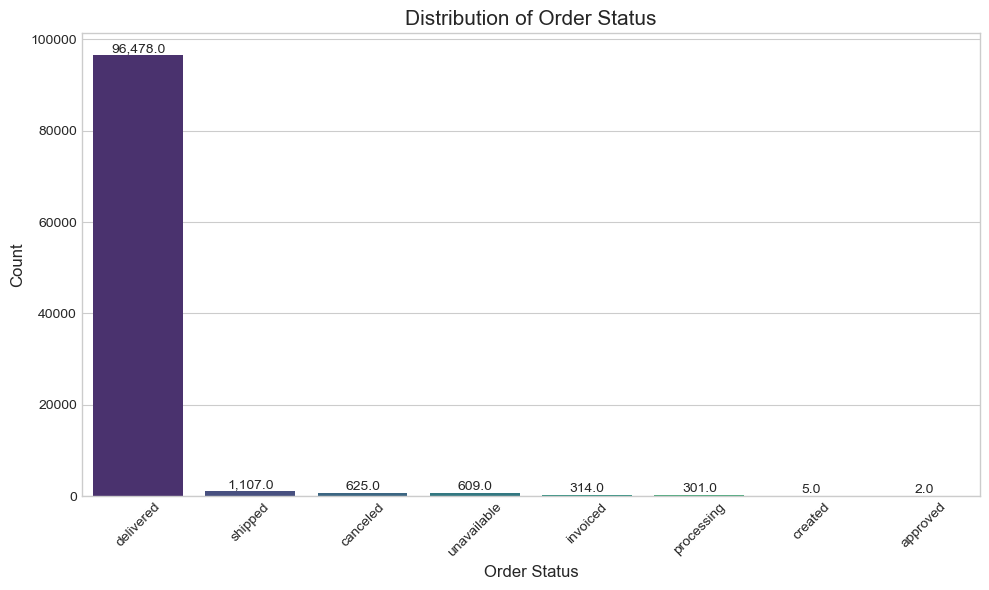

In [241]:
print("\n6. Starting exploratory data analysis...")

# 3.1 Order Status Analysis
print("\nOrder Status Distribution:")
status_counts = orders['order_status'].value_counts()
print(status_counts)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='order_status', data=orders, palette='viridis', order=status_counts.index)
plt.title('Distribution of Order Status', fontsize=15)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
plt.show()

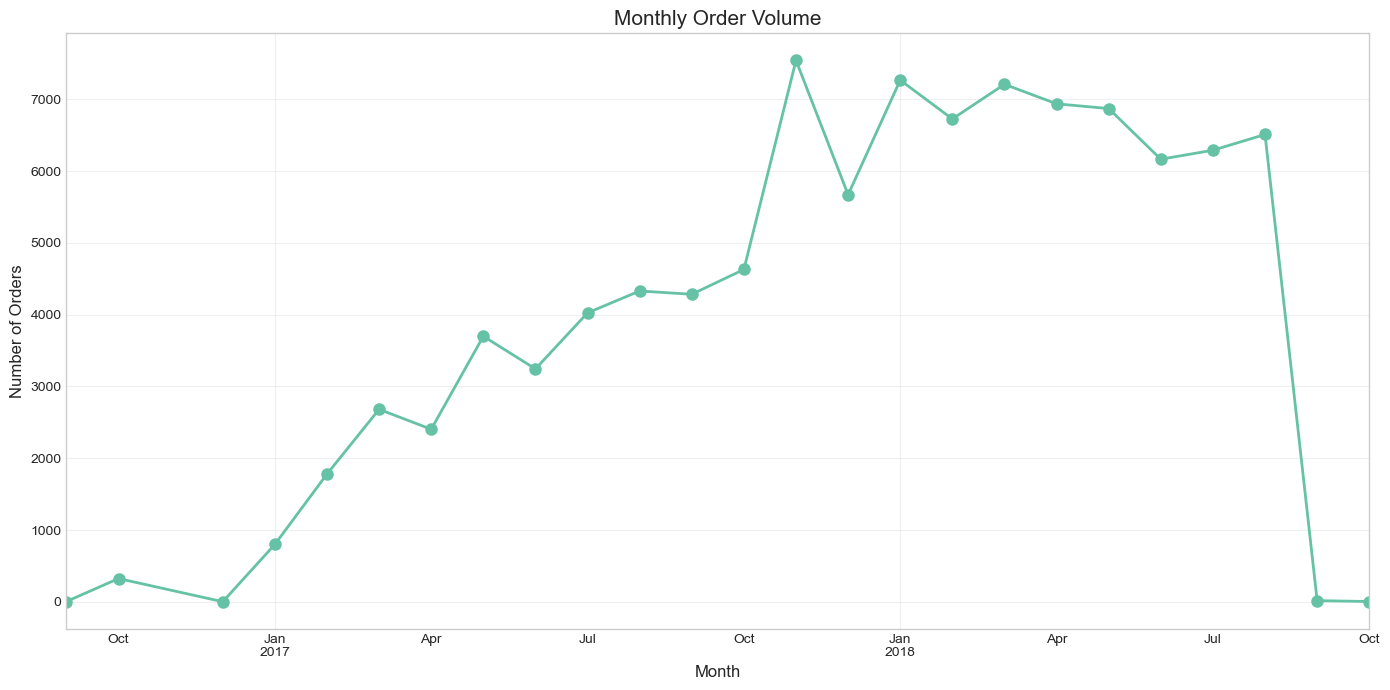

In [242]:
# 3.2 Order Volume Over Time
orders['order_purchase_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders.groupby('order_purchase_month').size()

plt.figure(figsize=(14, 7))
monthly_orders.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Monthly Order Volume', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Payment Method Distribution:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


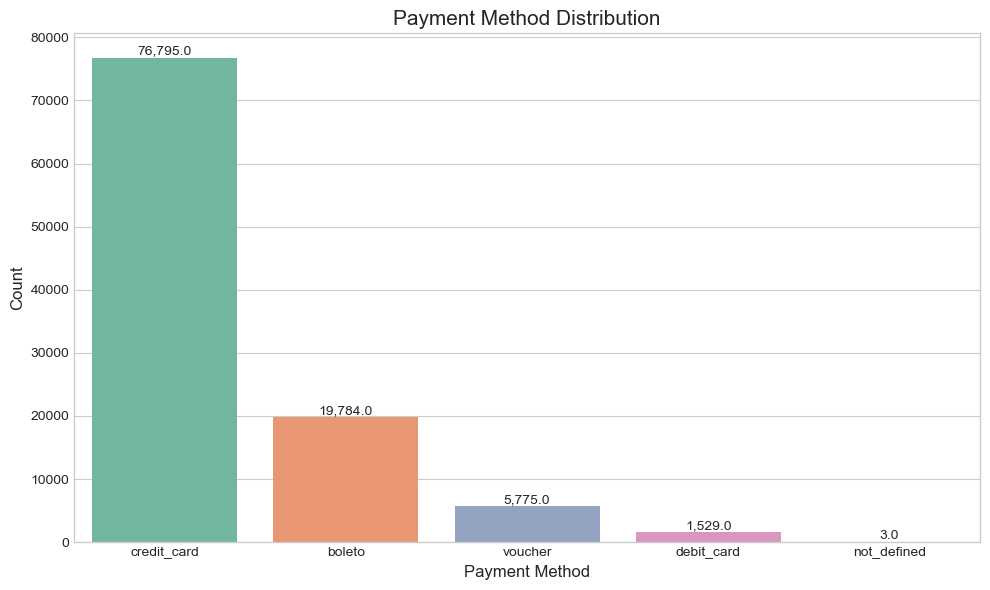

In [243]:
# 3.3 Payment Analysis
print("\nPayment Method Distribution:")
payment_method_counts = payments['payment_type'].value_counts()
print(payment_method_counts)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='payment_type', data=payments, palette='Set2', order=payment_method_counts.index)
plt.title('Payment Method Distribution', fontsize=15)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

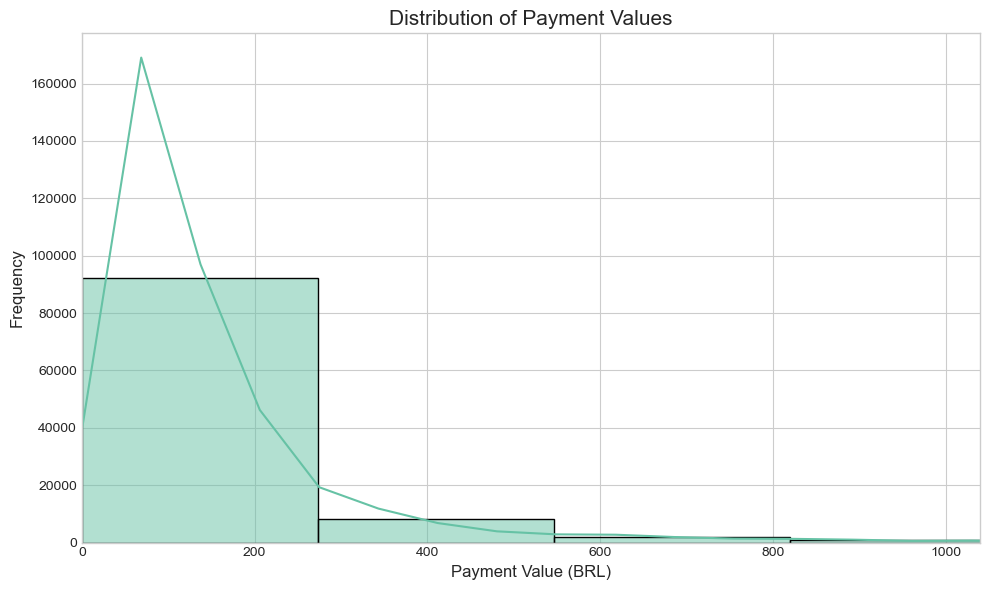

In [245]:
# Payment value analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=payments, x='payment_value', bins=50, kde=True)
plt.title('Distribution of Payment Values', fontsize=15)
plt.xlabel('Payment Value (BRL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, payments['payment_value'].quantile(0.99))  # Limit x-axis to 99th percentile to handle outliers
plt.tight_layout()
plt.show()

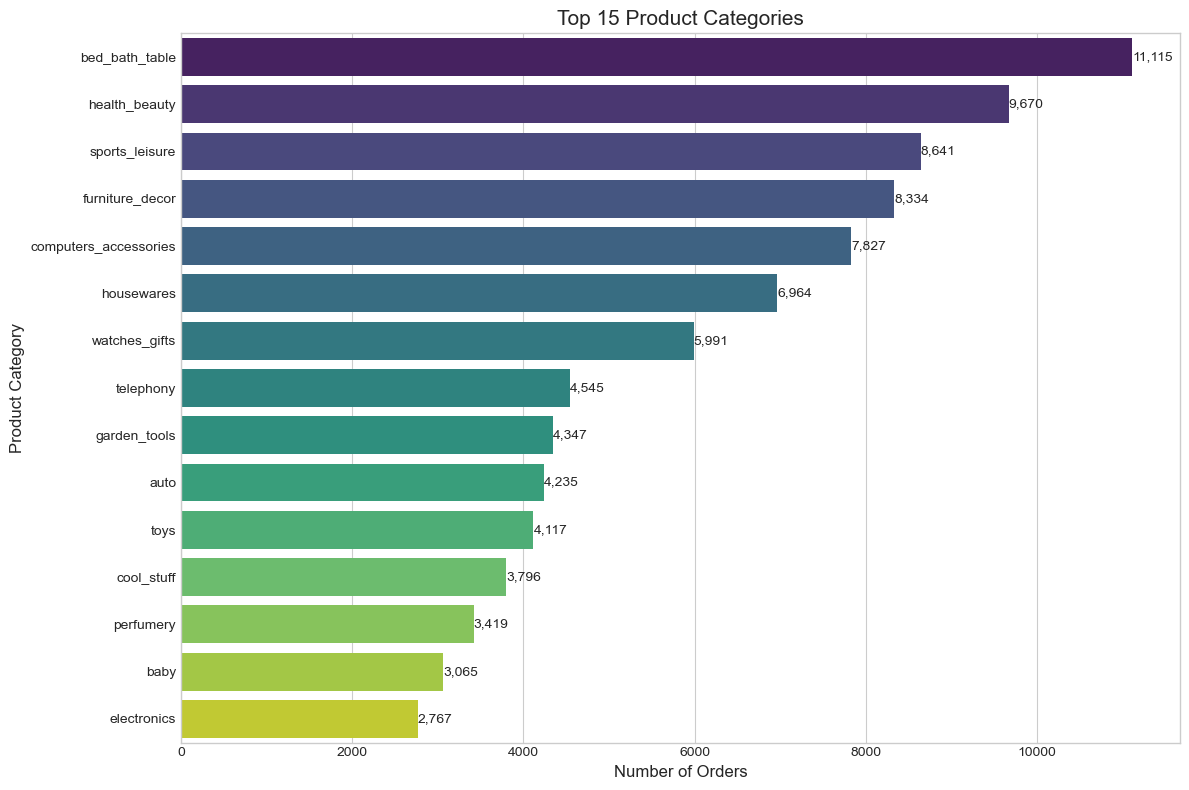

In [249]:
# 3.4 Product Category Analysis
top_categories = order_details['product_category_name_english'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 15 Product Categories', fontsize=15)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Add count labels to bars
for i, v in enumerate(top_categories.values):
    ax.text(v + 0.1, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

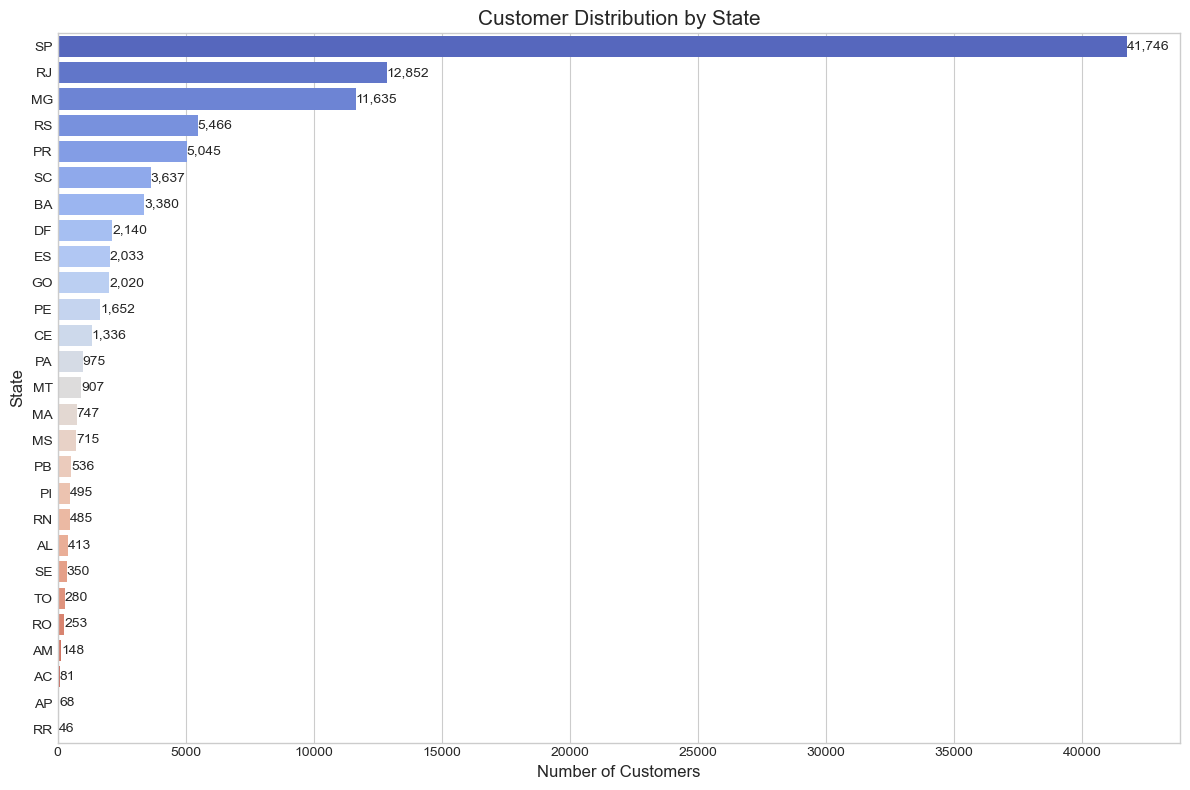

In [250]:
# 3.5 Geographic Analysis
customer_states = customers['customer_state'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=customer_states.values, y=customer_states.index, palette='coolwarm')
plt.title('Customer Distribution by State', fontsize=15)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('State', fontsize=12)

# Add count labels to bars
for i, v in enumerate(customer_states.values):
    ax.text(v + 0.1, i, f'{v:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

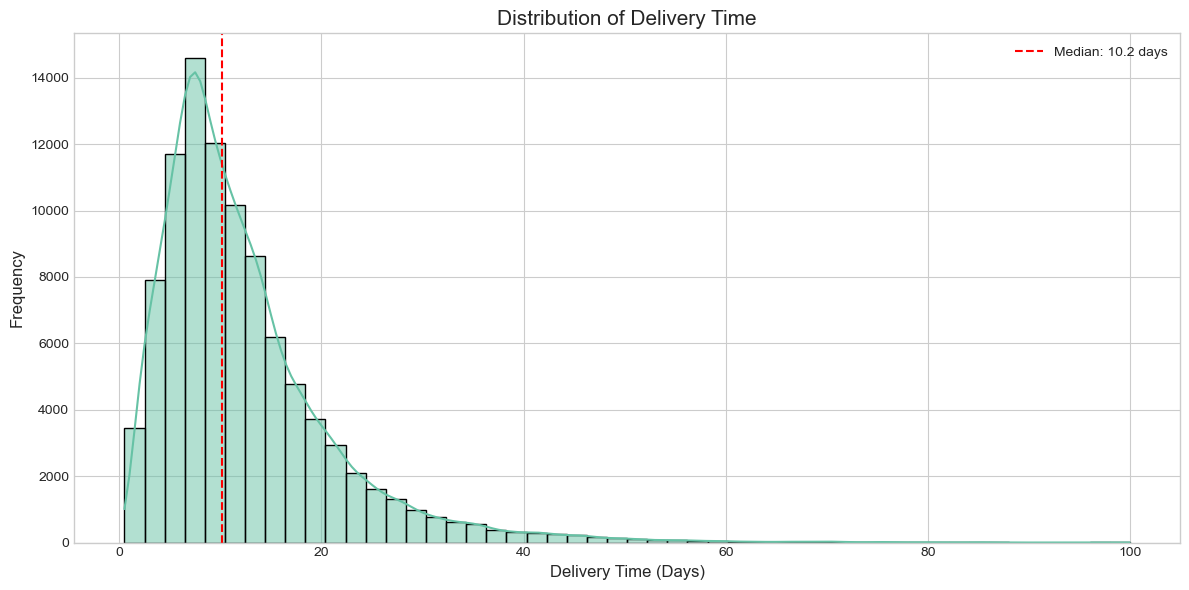

In [252]:
# 3.6 Delivery Time Analysis
# Filter out records where delivery time makes sense (positive and not too large)
valid_delivery = orders[(orders['delivery_time'] > 0) & (orders['delivery_time'] < 100)]

plt.figure(figsize=(12, 6))
sns.histplot(data=valid_delivery, x='delivery_time', bins=50, kde=True)
plt.axvline(valid_delivery['delivery_time'].median(), color='red', linestyle='--', 
            label=f'Median: {valid_delivery["delivery_time"].median():.1f} days')
plt.title('Distribution of Delivery Time', fontsize=15)
plt.xlabel('Delivery Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

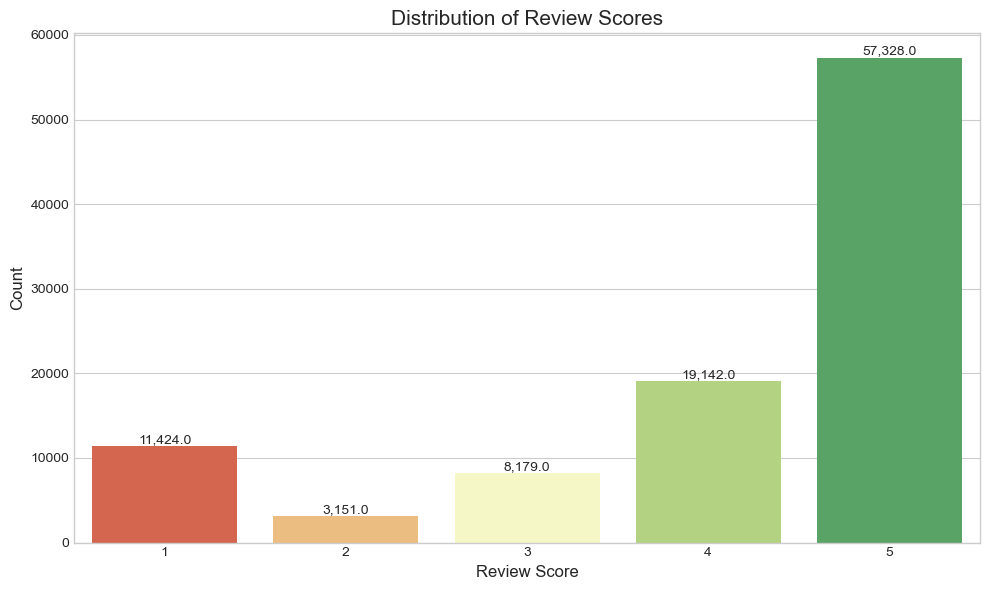

In [253]:
# 3.7 Customer Satisfaction Analysis
reviews['review_score'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='review_score', data=reviews, palette='RdYlGn', order=sorted(reviews['review_score'].unique()))
plt.title('Distribution of Review Scores', fontsize=15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

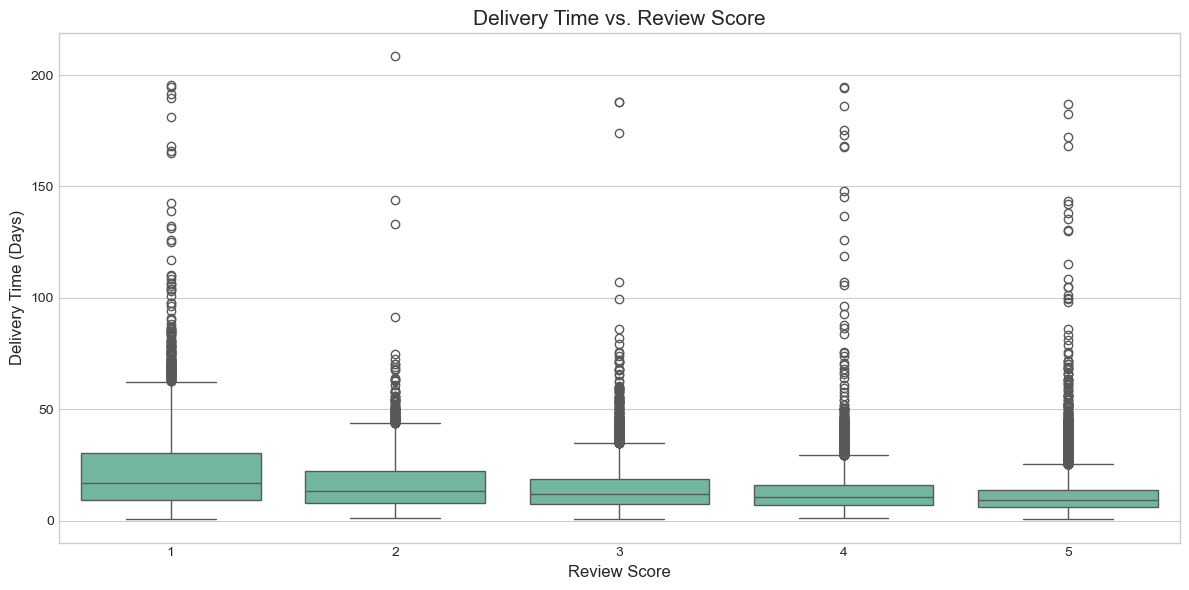

In [255]:
# Review score vs. delivery time
# Merge reviews with orders to analyze impact of delivery time on reviews
reviews_delivery = pd.merge(reviews, orders[['order_id', 'delivery_time', 'late_delivery']], on='order_id', how='left')
reviews_delivery = reviews_delivery.dropna(subset=['delivery_time'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='review_score', y='delivery_time', data=reviews_delivery)
plt.title('Delivery Time vs. Review Score', fontsize=15)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Delivery Time (Days)', fontsize=12)
plt.tight_layout()
plt.show()


7. Performing RFM Analysis...
RFM Customer Segmentation:
Customer_Segment
Active       50044
At Risk      24122
Champions    15631
Dormant       6299
Name: count, dtype: int64


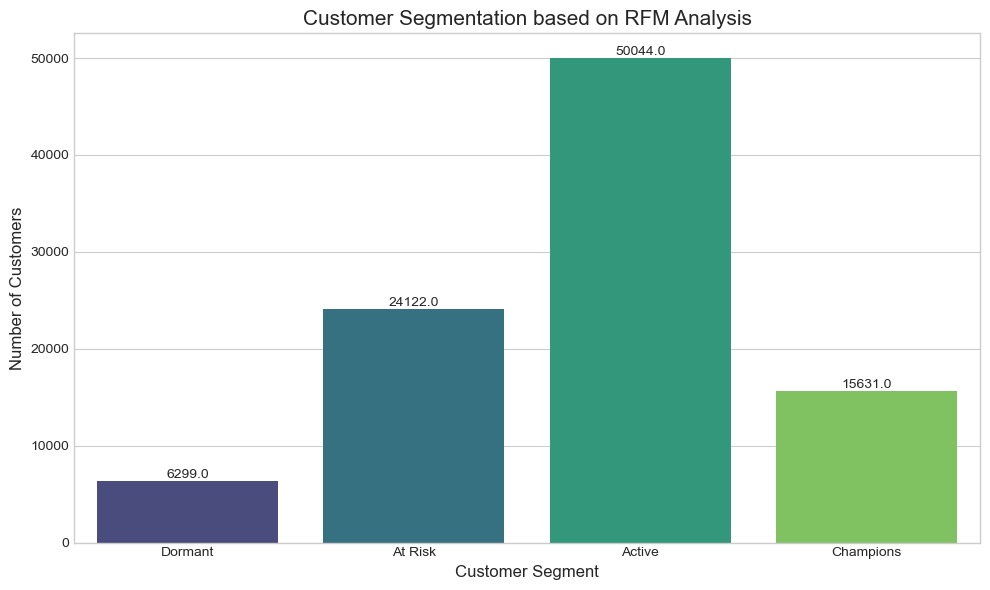

In [256]:
# 3.8 RFM Analysis (Recency, Frequency, Monetary)
print("\n7. Performing RFM Analysis...")

# Merge orders with customers to get customer_unique_id
orders_customers = pd.merge(orders, customers[['customer_id', 'customer_unique_id']], 
                           on='customer_id', how='left')

# Calculate RFM metrics
reference_date = orders['order_purchase_timestamp'].max()
rfm = orders_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
}).reset_index()
rfm.columns = ['customer_unique_id', 'Recency', 'Frequency']

# Merge with payments for Monetary
order_payments = pd.merge(order_payments, customers[['customer_id', 'customer_unique_id']], 
                         on='customer_id', how='left')
monetary = order_payments.groupby('customer_unique_id')['payment_value'].sum().reset_index()
rfm = pd.merge(rfm, monetary, on='customer_unique_id', how='left')
rfm['Monetary'] = rfm['payment_value'].fillna(0)

# Calculate RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=[4, 3, 2, 1])  # Lower Recency is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4])  # Handle low Frequency variation
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=[1, 2, 3, 4])  # Higher Monetary is better

# Total RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

# Assign segments - FIXED to match 3-12 score range
def assign_segment(score):
    if score >= 10:
        return 'Champions'
    elif score >= 7:
        return 'Active'
    elif score >= 5:
        return 'At Risk'
    else:
        return 'Dormant'  

rfm['Customer_Segment'] = rfm['RFM_Score'].apply(assign_segment)

# Print segment distribution
print("RFM Customer Segmentation:")
print(rfm['Customer_Segment'].value_counts())

# Plot bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Customer_Segment', data=rfm, palette='viridis', 
                   order=['Dormant', 'At Risk', 'Active', 'Champions'])
plt.title('Customer Segmentation based on RFM Analysis', fontsize=15)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

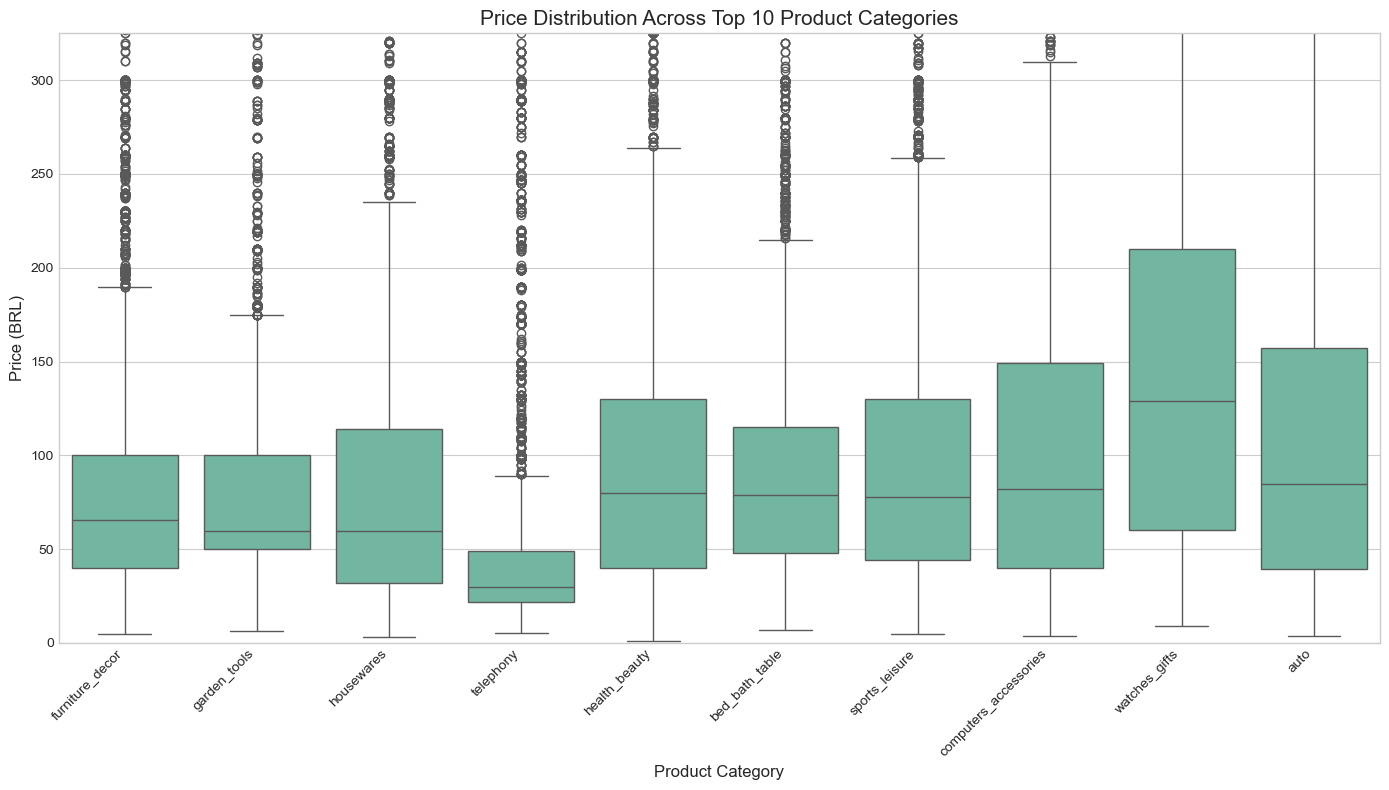

In [257]:
# 3.9 Price Distribution by Category
top_10_categories = order_details['product_category_name_english'].value_counts().nlargest(10).index
category_price_data = order_details[order_details['product_category_name_english'].isin(top_10_categories)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='product_category_name_english', y='price', data=category_price_data)
plt.title('Price Distribution Across Top 10 Product Categories', fontsize=15)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Price (BRL)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, category_price_data['price'].quantile(0.95))  # Limit y-axis to 95th percentile
plt.tight_layout()
plt.show()

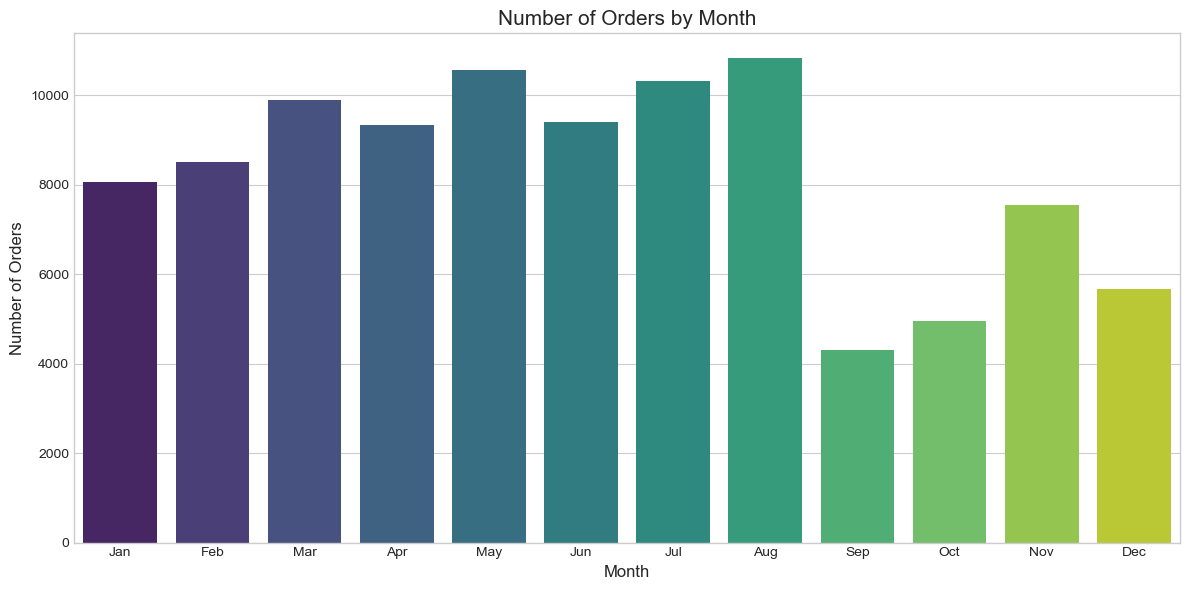

In [258]:
# 3.10 Seasonal Patterns
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['day_of_week'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['hour'] = orders['order_purchase_timestamp'].dt.hour

# Orders by month
plt.figure(figsize=(12, 6))
month_order = orders['month'].value_counts().sort_index()
sns.barplot(x=month_order.index, y=month_order.values, palette='viridis')
plt.title('Number of Orders by Month', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

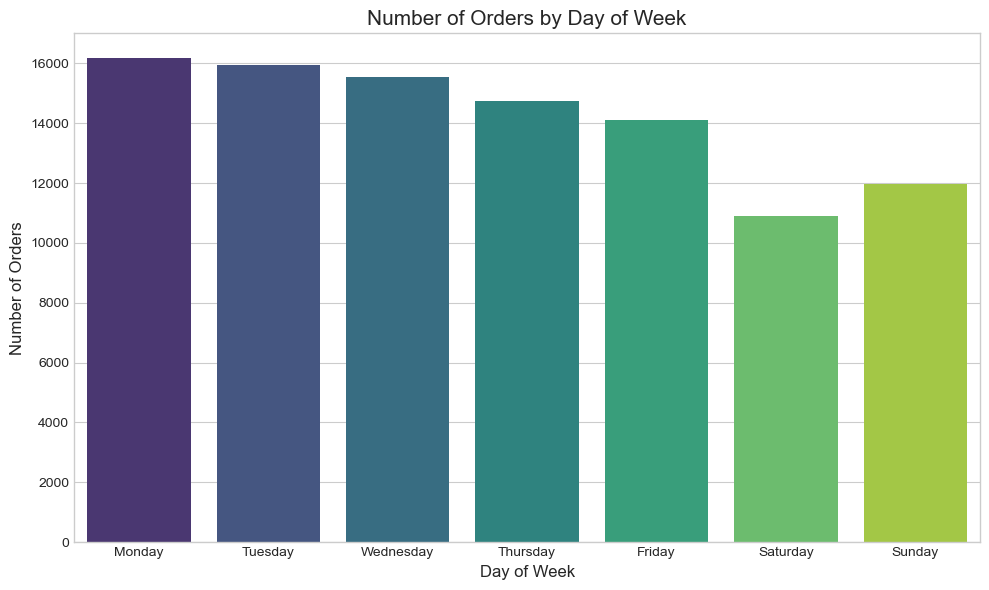

In [259]:
# Orders by day of week
plt.figure(figsize=(10, 6))
day_order = orders['day_of_week'].value_counts().sort_index()
sns.barplot(x=day_order.index, y=day_order.values, palette='viridis')
plt.title('Number of Orders by Day of Week', fontsize=15)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()

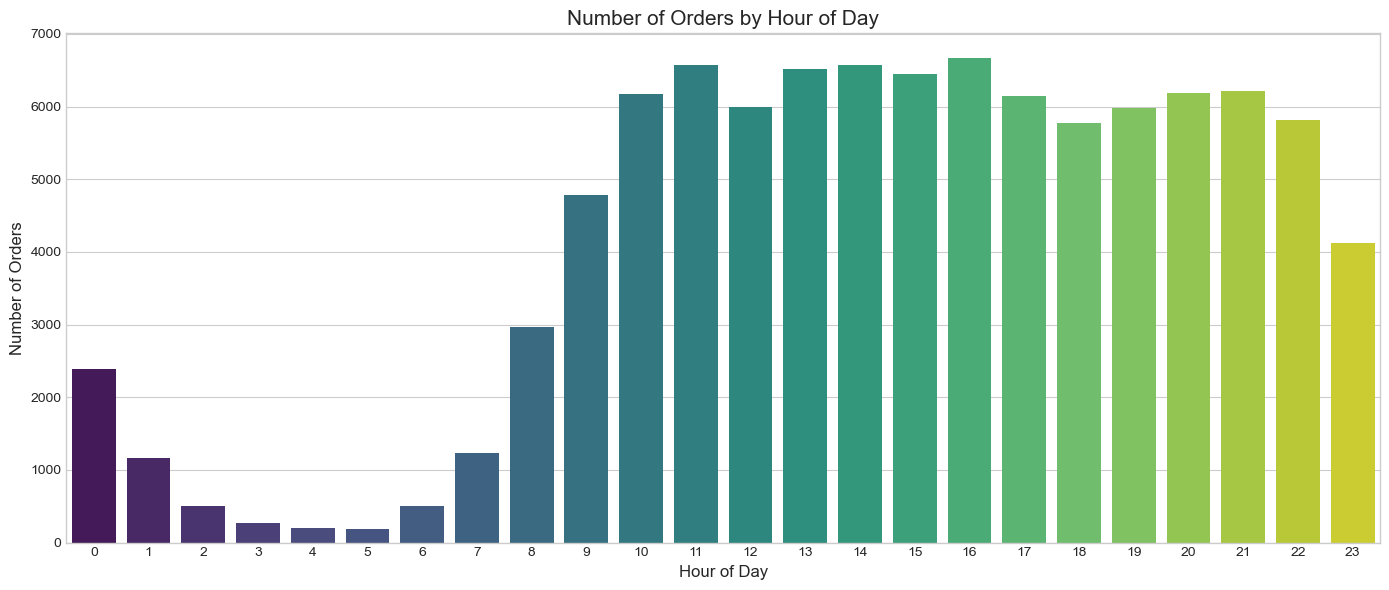

In [261]:
# Orders by hour
plt.figure(figsize=(14, 6))
hour_order = orders['hour'].value_counts().sort_index()
sns.barplot(x=hour_order.index, y=hour_order.values, palette='viridis')
plt.title('Number of Orders by Hour of Day', fontsize=15)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(24))
plt.tight_layout()
plt.show()

### Correlation Analysis

In [263]:
print("\n8. Performing correlation analysis...")

# Analyze correlations between review score, delivery time, and payment values
reviews_analysis = pd.merge(reviews, orders[['order_id', 'delivery_time', 'late_delivery']], on='order_id', how='left')
reviews_analysis = pd.merge(reviews_analysis, payments[['order_id', 'payment_value']], on='order_id', how='left')

# Drop rows with missing values for correlation analysis
reviews_analysis = reviews_analysis.dropna(subset=['delivery_time', 'payment_value', 'review_score'])

# Correlation matrix
correlation_columns = ['review_score', 'delivery_time', 'payment_value']
correlation_matrix = reviews_analysis[correlation_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


8. Performing correlation analysis...

Correlation Matrix:
               review_score  delivery_time  payment_value
review_score          1.000         -0.332         -0.040
delivery_time        -0.332          1.000          0.067
payment_value        -0.040          0.067          1.000


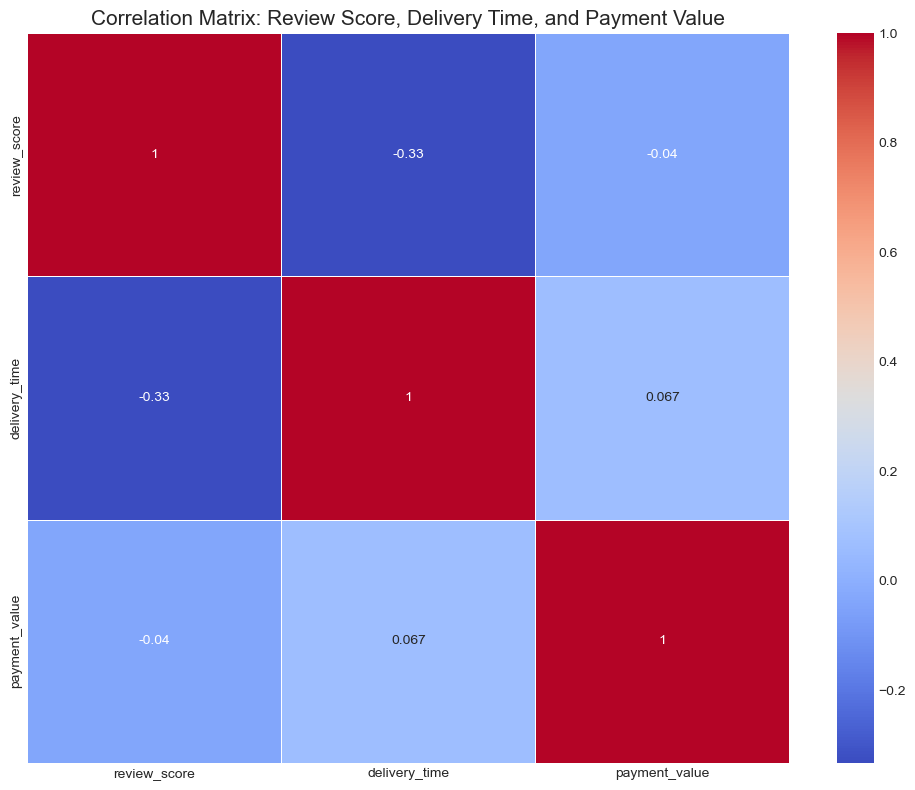

In [264]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Review Score, Delivery Time, and Payment Value', fontsize=15)
plt.tight_layout()
plt.show()

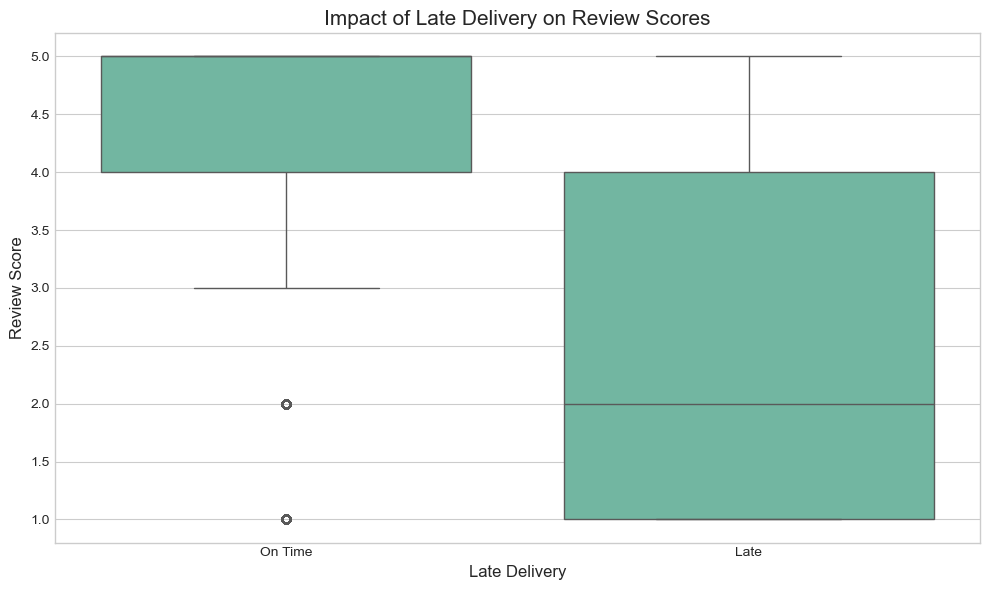

In [266]:
# Late delivery impact on review scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='late_delivery', y='review_score', data=reviews_analysis)
plt.title('Impact of Late Delivery on Review Scores', fontsize=15)
plt.xlabel('Late Delivery', fontsize=12)
plt.ylabel('Review Score', fontsize=12)
plt.xticks([0, 1], ['On Time', 'Late'])
plt.tight_layout()
plt.show()

### Business Insights and Recommendations


9. Generating business insights and recommendations...


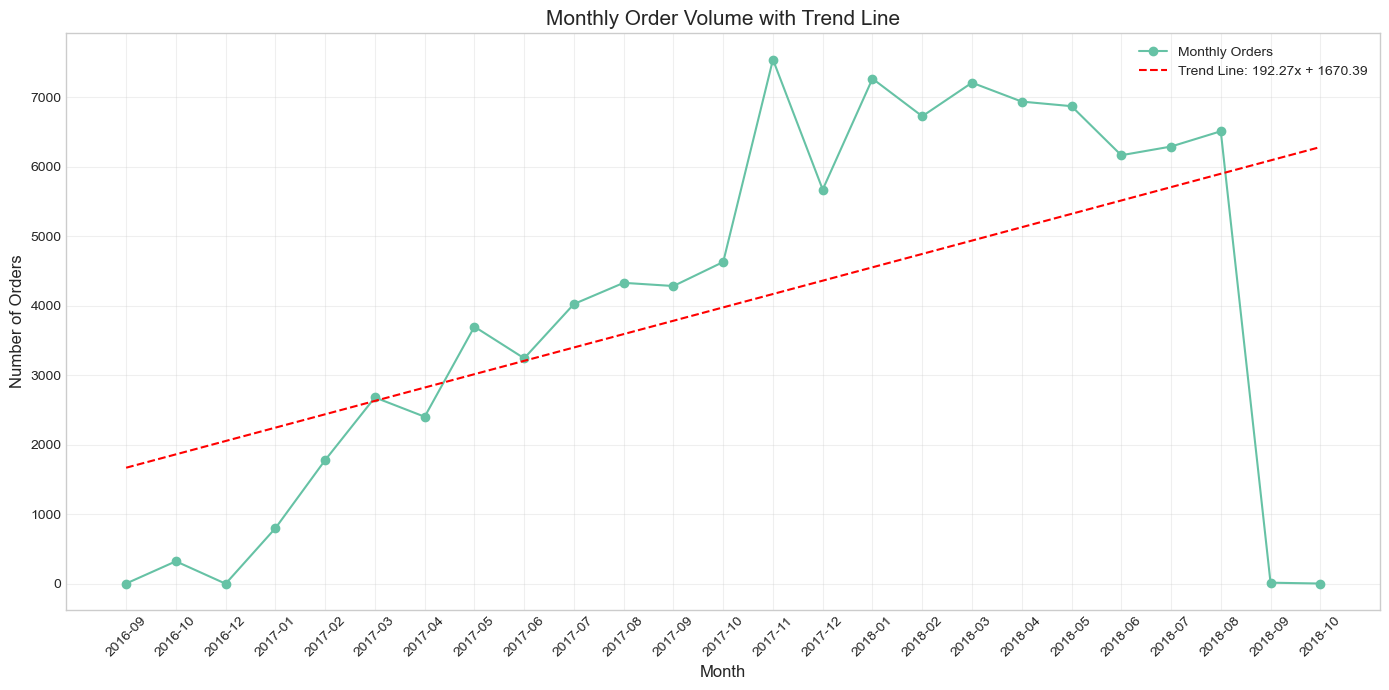

In [268]:
print("\n9. Generating business insights and recommendations...")

# 5.1 Overall Order Growth Trend
# Plot monthly growth with trend line
plt.figure(figsize=(14, 7))
monthly_orders_df = monthly_orders.reset_index()
monthly_orders_df['month_num'] = range(len(monthly_orders_df))

# Add trend line
x = monthly_orders_df['month_num']
y = monthly_orders_df[0]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(monthly_orders_df['order_purchase_month'].astype(str), y, 'o-', label='Monthly Orders')
plt.plot(monthly_orders_df['order_purchase_month'].astype(str), p(x), 'r--', label=f'Trend Line: {z[0]:.2f}x + {z[1]:.2f}')
plt.title('Monthly Order Volume with Trend Line', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

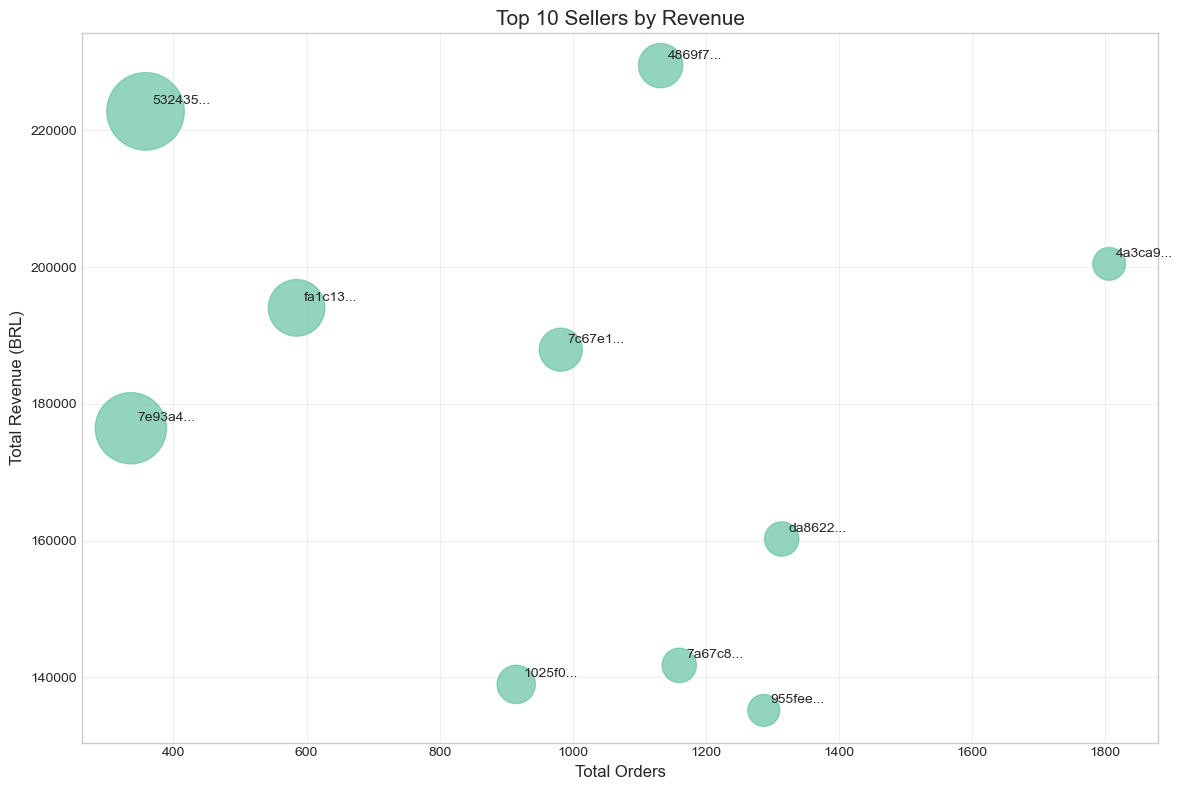

In [269]:
# 5.2 Top Sellers Analysis
seller_performance = order_items.groupby('seller_id').agg({
    'order_id': 'nunique',
    'price': 'sum'
}).reset_index()

seller_performance.columns = ['seller_id', 'total_orders', 'total_revenue']
seller_performance['average_order_value'] = seller_performance['total_revenue'] / seller_performance['total_orders']

# Top 10 sellers by revenue
top_sellers = seller_performance.sort_values('total_revenue', ascending=False).head(10)

# Performance of top sellers
plt.figure(figsize=(12, 8))
plt.scatter(top_sellers['total_orders'], 
           top_sellers['total_revenue'], 
           s=top_sellers['average_order_value']*5, 
           alpha=0.7)

for i, row in top_sellers.iterrows():
    plt.annotate(row['seller_id'][:6]+'...', 
                xy=(row['total_orders'], row['total_revenue']), 
                xytext=(5, 5), 
                textcoords='offset points')

plt.title('Top 10 Sellers by Revenue', fontsize=15)
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Total Revenue (BRL)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

FINAL DASHBOARD: Brazilian E-commerce Summary


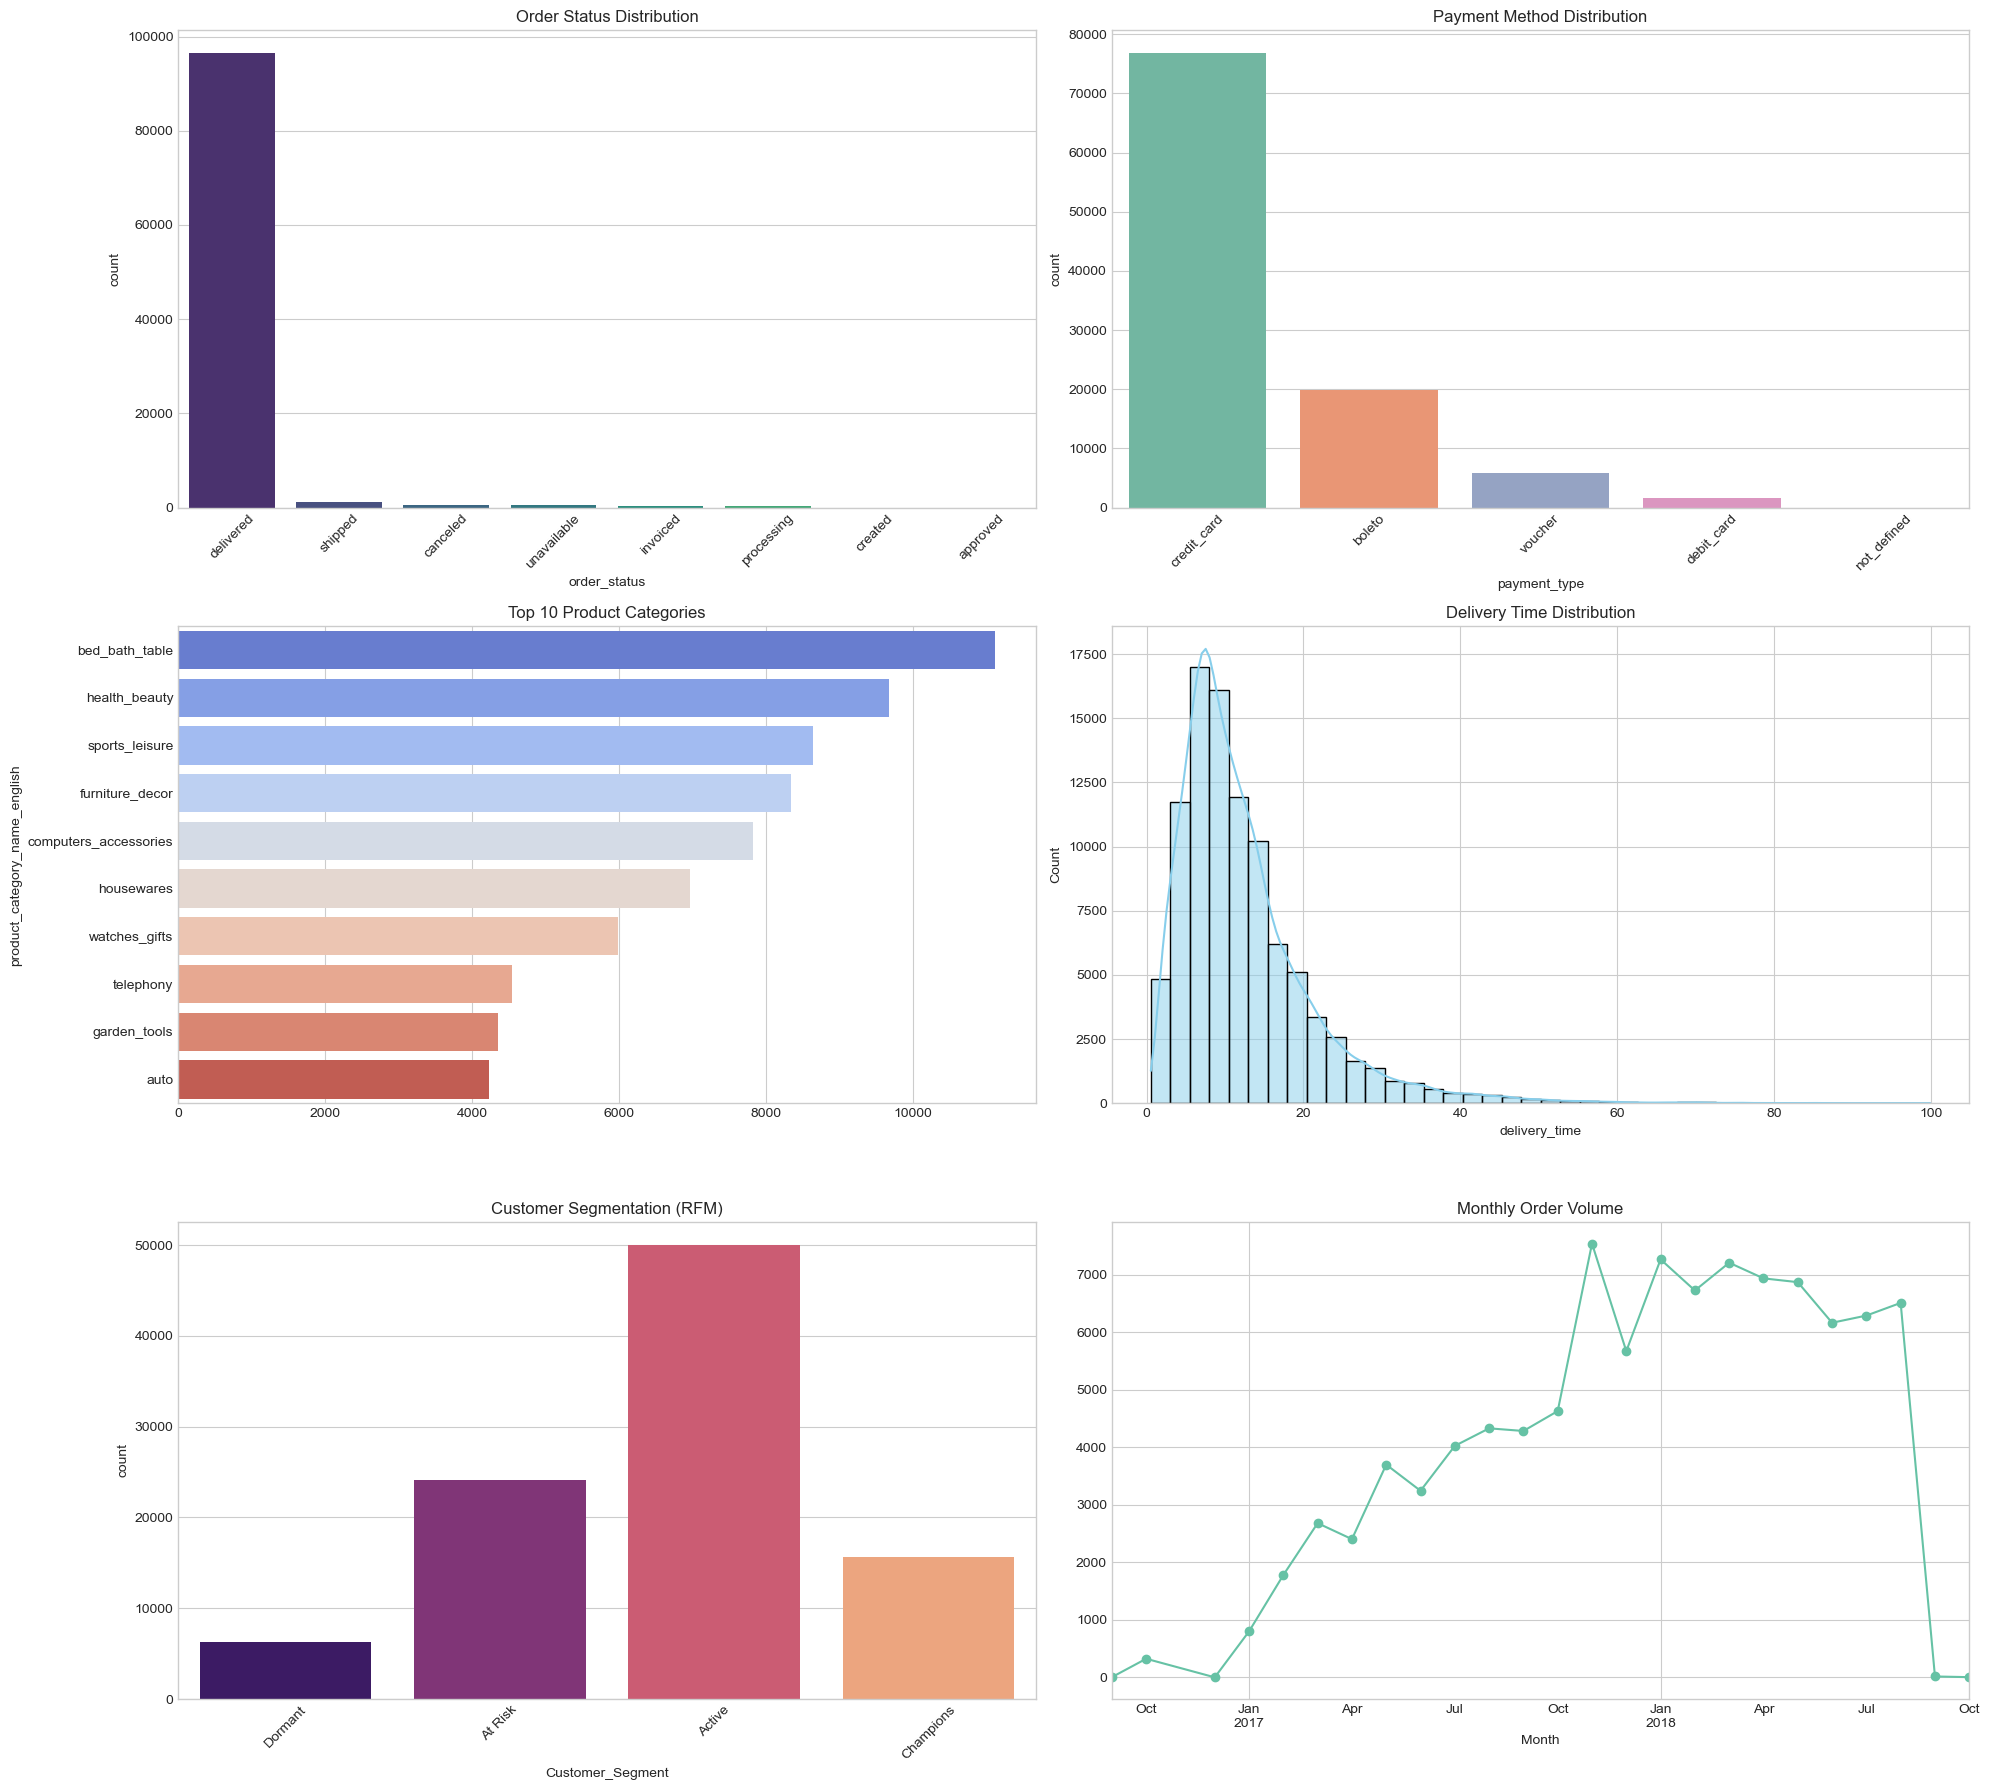

This dashboard summarizes key insights from the Olist E-commerce dataset analysis.


In [293]:
print("FINAL DASHBOARD: Brazilian E-commerce Summary")

# Create a dashboard
fig, axs = plt.subplots(3, 2, figsize=(20, 18))  # 3 rows, 2 columns

# 1. Order Status Distribution
sns.countplot(x='order_status', data=orders, ax=axs[0, 0], palette='viridis', order=orders['order_status'].value_counts().index)
axs[0, 0].set_title('Order Status Distribution')
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Payment Method Distribution
sns.countplot(x='payment_type', data=payments, ax=axs[0, 1], palette='Set2', order=payments['payment_type'].value_counts().index)
axs[0, 1].set_title('Payment Method Distribution')
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Top 10 Product Categories
top_categories = order_details['product_category_name_english'].value_counts().nlargest(10)
sns.barplot(y=top_categories.index, x=top_categories.values, ax=axs[1, 0], palette='coolwarm')
axs[1, 0].set_title('Top 10 Product Categories')

# 4. Delivery Time Distribution
valid_delivery = orders[(orders['delivery_time'] > 0) & (orders['delivery_time'] < 100)]
sns.histplot(valid_delivery['delivery_time'], ax=axs[1, 1], bins=40, kde=True, color='skyblue')
axs[1, 1].set_title('Delivery Time Distribution')

# 5. Customer Segmentation
sns.countplot(x='Customer_Segment', data=rfm, palette='magma', order=['Dormant', 'At Risk', 'Active', 'Champions'], ax=axs[2, 0])
axs[2, 0].set_title('Customer Segmentation (RFM)')
axs[2, 0].tick_params(axis='x', rotation=45)

# 6. Monthly Order Volume
monthly_orders = orders.groupby('order_purchase_month').size()
monthly_orders.plot(kind='line', marker='o', ax=axs[2, 1])
axs[2, 1].set_title('Monthly Order Volume')
axs[2, 1].set_xlabel('Month')

plt.tight_layout()
plt.show()

print("This dashboard summarizes key insights from the Olist E-commerce dataset analysis.")

### Conclusion and Summary

In [295]:
print("\n10. Generating conclusion and summary...")

print("""
# Summary of Key Findings:

1. Order Status: Most orders are successfully delivered, with 'delivered' being the most common status.

2. Monthly Order Trend: There's an observable trend in order volume over time, which provides insights into the business growth trajectory.

3. Payment Methods: Credit card is the dominant payment method, followed by boleto (a Brazilian payment method).

4. Product Categories: The most popular product categories have been identified, with significant variations in their pricing.

5. Geographic Distribution: There's a concentration of customers in certain Brazilian states, indicating potential regional market strengths.

6. Delivery Performance: Delivery times show variation, with some correlation to customer satisfaction levels.

7. Customer Satisfaction: Review scores are generally positive, with most customers giving 4 or 5-star ratings.

8. RFM Segmentation: The customer base has been segmented into Champions, Active, At Risk, and Dormant customers based on their recent activity, purchase frequency, and monetary value.

9. Seasonal Patterns: Clear patterns in purchasing behavior across months, days of the week, and hours of the day have been identified.

10. Seller Performance: Analysis of top-performing sellers reveals characteristics of successful vendors on the platform.

# Business Recommendations:

1. Improve delivery times, especially for product categories that show a strong correlation between delivery delays and lower review scores.

2. Develop targeted marketing campaigns for the identified customer segments, with a focus on reactivating 'At Risk' and 'Dormant' customers.

3. Optimize product offerings based on popular categories and their price elasticity.

4. Expand marketing efforts in states with lower customer density to increase market penetration.

5. Leverage the identified seasonal patterns to plan inventory and marketing campaigns accordingly.

6. Study the practices of top-performing sellers to create best practice guidelines for all sellers on the platform.

7. Investigate payment method distribution and consider offering incentives for using preferred payment methods.

This analysis provides a comprehensive view of the Brazilian e-commerce landscape based on the Olist dataset, offering valuable insights for business decision-making and strategy development.
""")

print("\nEDA project completed successfully!")


10. Generating conclusion and summary...

# Summary of Key Findings:

1. Order Status: Most orders are successfully delivered, with 'delivered' being the most common status.

2. Monthly Order Trend: There's an observable trend in order volume over time, which provides insights into the business growth trajectory.

3. Payment Methods: Credit card is the dominant payment method, followed by boleto (a Brazilian payment method).

4. Product Categories: The most popular product categories have been identified, with significant variations in their pricing.

5. Geographic Distribution: There's a concentration of customers in certain Brazilian states, indicating potential regional market strengths.

6. Delivery Performance: Delivery times show variation, with some correlation to customer satisfaction levels.

7. Customer Satisfaction: Review scores are generally positive, with most customers giving 4 or 5-star ratings.

8. RFM Segmentation: The customer base has been segmented into Champions,